In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "all"
z_range = "low_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
print(len(clusters))
print(len(shapes))

553
15377


In [5]:
# Print the numbers of galaxies that needed to be masked

assert np.sum(shapes[('All','e1')]==-9999)==0
assert np.sum(shapes[('All','e2')]==-9999)==0
assert np.sum(shapes['All','flags_select'])==0
assert np.sum(shapes[('All','PP')]<=0.55)==0

In [6]:
#masking
print(len(clusters))
print(len(shapes))

553
15377


# Stats of e1,e2

count    15377.000000
mean        -0.001163
std          0.144476
min         -0.659677
25%         -0.074831
50%         -0.000793
75%          0.073394
max          0.683530
Name: (All, e2), dtype: float64

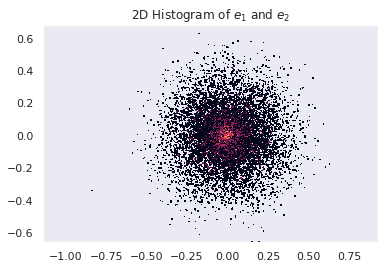

In [7]:
from matplotlib.colors import LogNorm 
plt.hist2d(shapes['All','e1'],shapes['All','e2'],bins=500,norm=LogNorm())
plt.axis('equal')
plt.title("2D Histogram of $e_1$ and $e_2$")
pd.Series(shapes['All','e1']).describe()
pd.Series(shapes['All','e2']).describe()

count    15377.000000
mean        -1.055218
std        170.258909
min     -20097.585018
25%         -1.007700
50%         -0.007954
75%          0.986521
max       3224.125134
dtype: float64

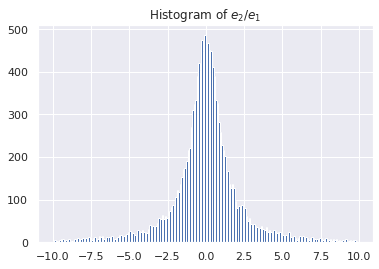

In [8]:
#statistics and hisgoram of e2/e1
plt.hist(shapes['All','e2']/shapes['All','e1'],bins=np.arange(-10,10,0.1))
plt.title("Histogram of $e_2$/$e_1$")
pd.Series(shapes['All','e2']/shapes['All','e1']).describe()

# Get phi 

In [9]:
def get_std_err_of_mean(np_array):
    mean=np_array.mean()
    std=np_array.std()
    n=len(np_array)
    return(std/np.sqrt(n))

In [10]:
phi_1d=shapes[('All','phi')]

## Stats for unweighted

In [11]:
pd.Series(phi_1d).describe()
print("Mean:{:05e} \nStdE:{:05e} ".format(phi_1d.mean(),phi_1d.std()/np.sqrt(len(phi_1d))))

Mean:4.469593e+01 
StdE:2.091370e-01 


count    15377.000000
mean        44.695930
std         25.933829
min          0.004916
25%         22.315225
50%         44.255851
75%         67.150160
max         89.996478
Name: (All, phi), dtype: float64

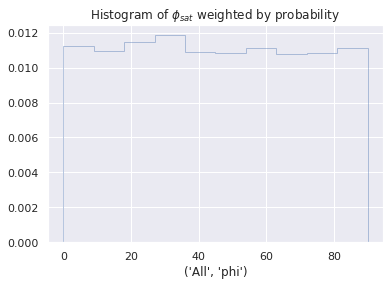

In [12]:
ax = sns.distplot(shapes[('All','phi')],bins=10,kde=False,norm_hist=True, 
                  hist_kws={"histtype": "step"})
ax.set_title("Histogram of $\phi_{sat}$ weighted by probability") 
pd.Series(phi_1d).describe()

# Get e

## Statistics of e1 and e2

In [13]:
e1=shapes[('All','e1')].to_numpy()
shapes[('All','e1')].describe()

count    15377.000000
mean         0.000464
std          0.142475
min         -0.838272
25%         -0.073868
50%         -0.000903
75%          0.074467
max          0.629636
Name: (All, e1), dtype: float64

In [14]:
e2=shapes[('All','e1')].to_numpy()
shapes[('All','e2')].describe()

count    15377.000000
mean        -0.001163
std          0.144476
min         -0.659677
25%         -0.074831
50%         -0.000793
75%          0.073394
max          0.683530
Name: (All, e2), dtype: float64

In [15]:
# np.save("/home/cz136/project/sa/data/{}/e_array".format(dir_string),e_list)

In [16]:
e_p_1d=shapes[('All','ep')]
e_x_1d=shapes[('All','ex')]

mean=-1.229154e-03, std_mean=1.158731e-03


count    15377.000000
mean        -0.001229
std          0.143687
min         -0.572903
25%         -0.075647
50%         -0.000888
75%          0.073147
max          0.630630
Name: (All, ep), dtype: float64

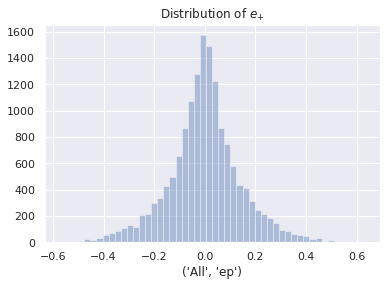

In [17]:
ax=sns.distplot(e_p_1d,kde=False)
ax.set_title("Distribution of $e_{+}$")
print ("mean={:05e}, std_mean={:05e}".format(e_p_1d.mean(),get_std_err_of_mean(e_p_1d)))
pd.Series(e_p_1d).describe()

mean=1.564721e-03, std_mean=1.155300e-03


count    15377.000000
mean         0.001565
std          0.143262
min         -0.903223
25%         -0.072143
50%          0.000088
75%          0.074812
max          0.666528
Name: (All, ex), dtype: float64

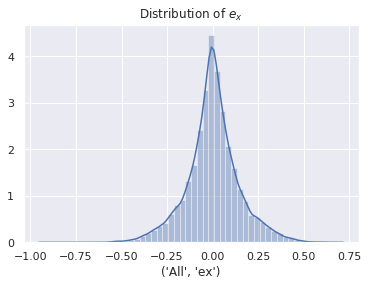

In [18]:
ax=sns.distplot(e_x_1d)
ax.set_title("Distribution of $e_{x}$")
print ("mean={:05e}, std_mean={:05e}".format(e_x_1d.mean(),get_std_err_of_mean(e_x_1d)))
pd.Series(e_x_1d).describe()